**Информация о Датасете**


![alt text](https://storage.googleapis.com/kaggle-media/competitions/playground/Microscope  =400x290)



**Данные для этого ядра являются слегка измененной версией набора данных PatchCamelyon (PCam). Исходный набор данных PCam содержит дубликаты изображений из-за его вероятностной выборки, однако версия представленная на Kaggle, не содержит дубликатов.**

---

**PatchCamelyon - это новый и сложный набор данных для классификации изображений. Он состоит из 327,680 цветных изображений (96 х 96 пикселей), полученных из гистопатологических сканирований срезов лимфатических узлов. Каждое изображение помечено двоичной меткой, указывающей на наличие метастатической ткани. PCam предоставляет новый эталон для моделей машинного обучения: больше чем CIFAR10, меньше чем imagenet, что делает его обучаемым на одном графическом процессоре.**

---

**Датасет PCam  дает возможноть решить клинически-значимую  задачу обнаружения метастазирования ,путем решения задачи  бинарной классификации изображений, схожую с CIFAR-10 и MNIST. Модели можно легко обучить на одном графическом процессоре за пару часов, и они могут получить конкурентные результаты в задачах Camelyon16 по обнаружению опухолей и диагностике всего слайда. Кроме того, баланс между сложностью задачи и способностью к обучению делает его главным кандидатом для фундаментальных исследований машинного обучения, как классического так и глубокого.**


### Exploratory Data Analysis (EDA)

**Целью этой EDA является:**

* Посмотреть на данные
* Понять распределение двух классов (опухолевой ткани нету / опухолевая ткань есть)
*  Посмотрить на некоторые особенности изображения (распределение каналов RGB, средняя яркость и т.д.)

****Загрузка данных через  API kaggle****

In [0]:
!pip install kaggle

In [0]:
import os
user = ''
key = ''
 
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c histopathologic-cancer-detection

  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 88.4MB/s]
 98% 5.00M/5.10M [00:00<00:00, 46.0MB/s]
100% 5.10M/5.10M [00:00<00:00, 32.6MB/s]
 99% 1.29G/1.30G [00:12<00:00, 91.0MB/s]
100% 1.30G/1.30G [00:12<00:00, 112MB/s] 
100% 4.98G/4.98G [01:00<00:00, 96.2MB/s]
100% 4.98G/4.98G [01:00<00:00, 87.9MB/s]


In [0]:
!ls

sample_data		   test.zip		 train.zip
sample_submission.csv.zip  train_labels.csv.zip


In [0]:
!unzip train.zip -d train

In [0]:
!unzip train_labels.csv.zip

In [0]:
!ls

sample_data		   test.zip  train_labels.csv	   train.zip
sample_submission.csv.zip  train     train_labels.csv.zip


In [0]:
import cv2 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline
plt.rcParams["axes.grid"] = False

In [0]:
train_df = pd.read_csv('train_labels.csv')

In [0]:
# Посмотрим на данные csv файла
train_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


Все изображения помечены как 0 или 1, где 0 = нет опухолевой ткани и 1 = опухолевая ткань есть

In [0]:
# Размерность датафрейма
train_df.shape

(220025, 2)

**Посмотрим на случайную фотографию из набора**

In [0]:
img = cv2.imread('train/bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif')
img.shape

(96, 96, 3)

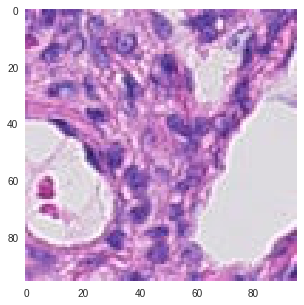

In [0]:
plt.figure(figsize=(5,5));
plt.imshow(img[...,[2,1,0]]);

**Узнаем количество уникальных фотографий**

In [0]:
len(train_df['id'].value_counts())

220025

**Распределение меток  опухолевая ткань есть / опухолевой ткани нету**

In [0]:
train_df[train_df['label']==1].shape , train_df[train_df['label']==0].shape

((89117, 2), (130908, 2))

**Визуализируем распределение меток рак/не рак**

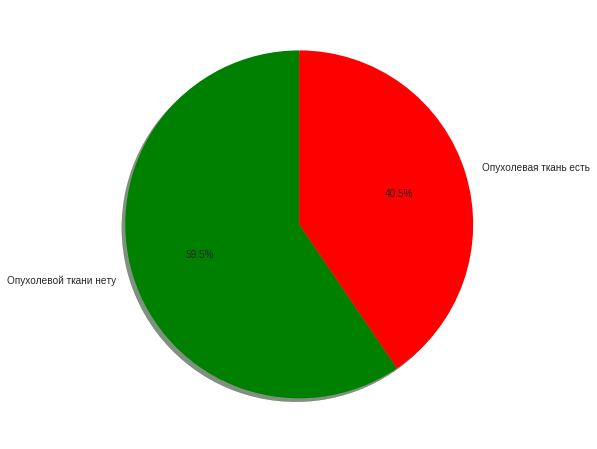

In [0]:
labels = 'Опухолевой ткани нету','Опухолевая ткань есть'
colors=['green','red']

plt.figure(figsize=(8,8))
plt.pie(train_df.groupby('label').size(),labels=labels,autopct='%1.1f%%',
        colors=colors,shadow=True, startangle=90)
plt.show()

**Посмотрим на несколько фотографий **

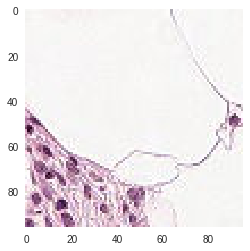

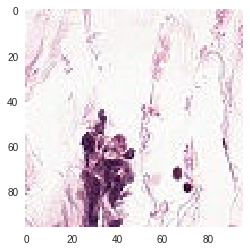

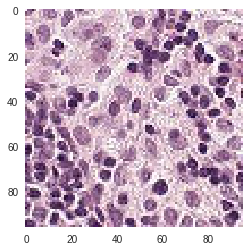

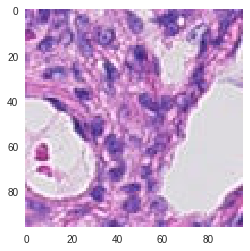

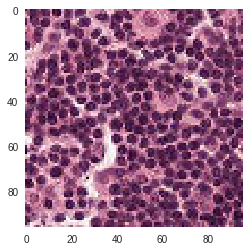

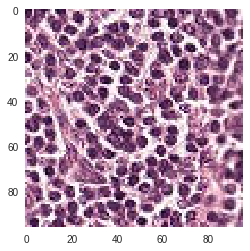

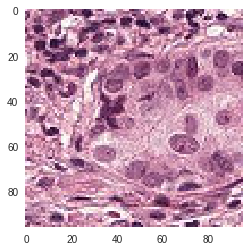

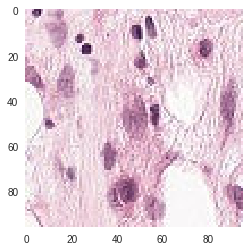

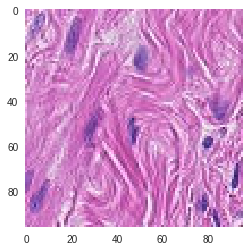

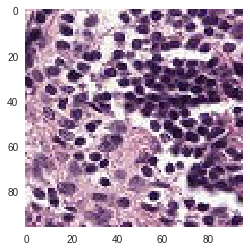

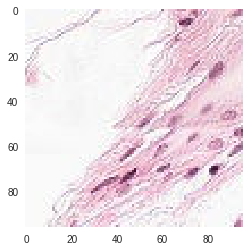

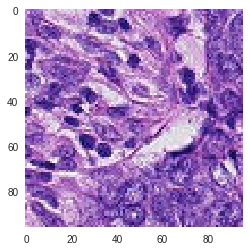

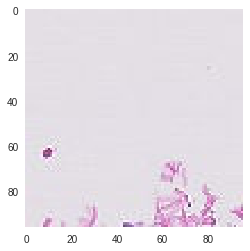

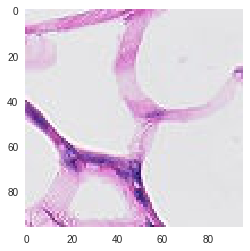

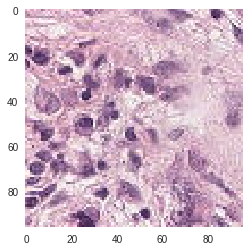

In [0]:
for i in range(15):
  img = cv2.imread('train/{}'.format(train_df.loc[i,'id']+ str('.tif')))
  plt.imshow(img[...,[2,1,0]])
  plt.show()

**Отрисуем и посмотрим на разницу между снимками где опухолевая ткань присутствует, и где ее нету.**


**Опухолевой ткани нет**

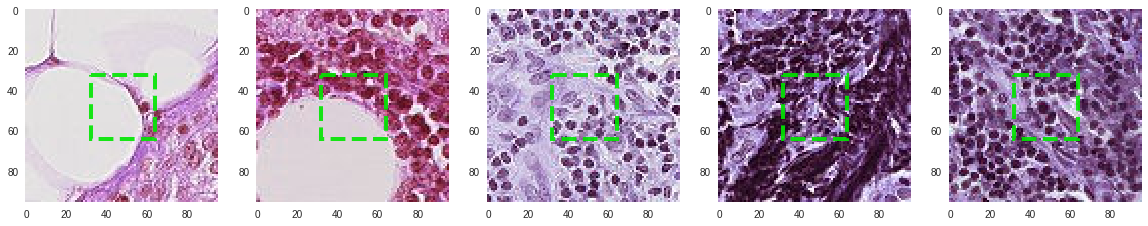

In [0]:
fig,ax = plt.subplots(1,5,figsize=(20,5))

for i, idx in enumerate(train_df[train_df['label']==0]['id'][-5:]):
  path = os.path.join('train',idx)
  ax[i].imshow(cv2.imread(path + '.tif'))
  p = Polygon(((32,32),(64,32),(64,64),(32,64)),
             fc=(0.0,0.0,0.0,0.0),
              ec=(0.0,0.9,0.0,0.9),lw=4,linestyle='--')
  ax[i].add_patch(p)

**Есть опухолевая ткань**

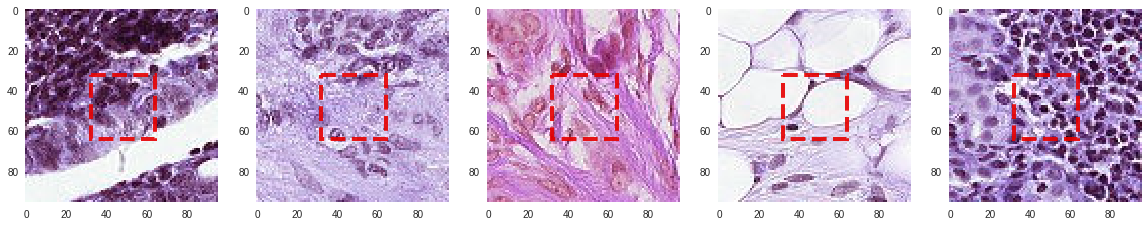

In [0]:
fig ,ax = plt.subplots(1,5, figsize=(20,5))

for i, idx in enumerate(train_df[train_df['label']==1]['id'][-5:]):
  path = os.path.join('train',idx)
  ax[i].imshow(cv2.imread(path + '.tif'))  
  p = Polygon(((32, 32), (64, 32), (64, 64), (32, 64)),
            fc=(0.0, 0.0, 0.0, 0.0), 
            ec=(0.9, 0.0, 0.0 ,0.9), lw=4, linestyle='--')
  ax[i].add_patch(p)